In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns

In [62]:
cwd=os.getcwd()
os.chdir('C:\\Users\\Dimas\\Desktop\\Geekbrains\\Python')
data=pd.read_csv('train.csv')

In [63]:
data=pd.get_dummies(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Price            10000 non-null float64
Ecology_2_A      10000 non-null uint8
Ecology_2_B      10000 non-null uint8
Ecology_3_A      10000 non-null uint8
Ecology_3_B      10000 non-null uint8
Shops_2_A        10000 non-null uint8
Shops_2_B        10000 non-null uint8
dtyp

In [5]:
median_LifeSquare=data['LifeSquare'].median()
data['LifeSquare']=data['LifeSquare'].fillna(median_LifeSquare)
median_Healthcare1=data['Healthcare_1'].median()
data['Healthcare_1']=data['Healthcare_1'].fillna(median_Healthcare1)

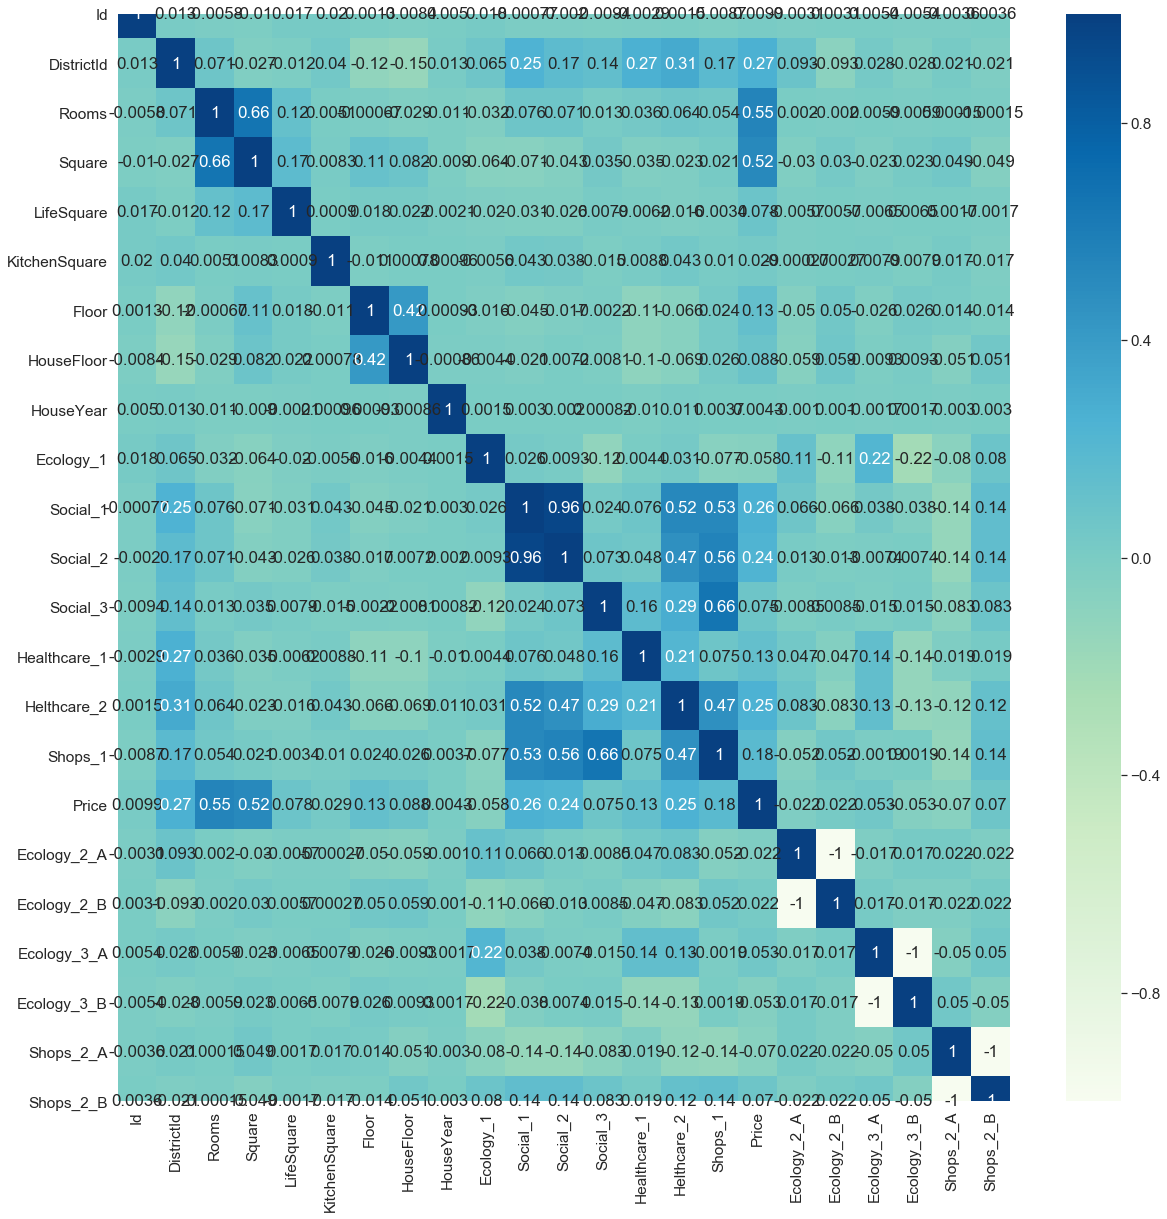

In [6]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.4)
sns.heatmap(data.corr(),annot=True,cmap='GnBu')

In [7]:
data1=data.drop(['Ecology_2_B','Ecology_3_B','Shops_2_B','Social_2','Id'],axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CBC0BC8>,
      dtype=object)

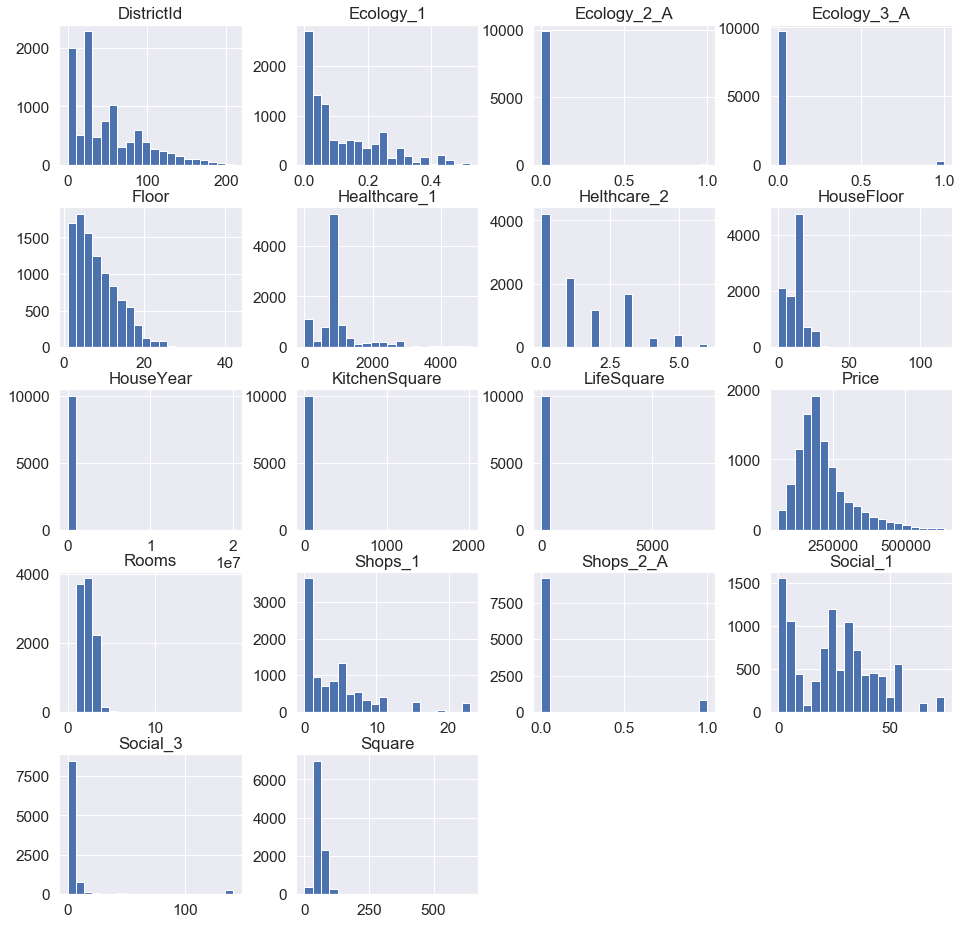

In [8]:
data1.hist(figsize=(16,16),bins=20)

In [11]:
def change_outlier(df,name):
    first_quartile = df[name].describe()['25%']
    third_quartile = df[name].describe()['75%']

    # Interquartile range
    iqr = third_quartile - first_quartile
    x1=third_quartile + 3* iqr
    x2=third_quartile - 3 * iqr

    # Remove outliers
    df.loc[(df[name] > x1)|(df[name] < x2),name]=df[name].median()

In [12]:
change_outlier(data1,'KitchenSquare')
change_outlier(data1,'LifeSquare')
change_outlier(data1,'Rooms')
change_outlier(data1,'HouseFloor')
change_outlier(data1,'Square')
change_outlier(data1,'HouseYear')
change_outlier(data1,'Healthcare_1')
change_outlier(data1,'Social_3')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DDD20C8>,
      dtype=object)

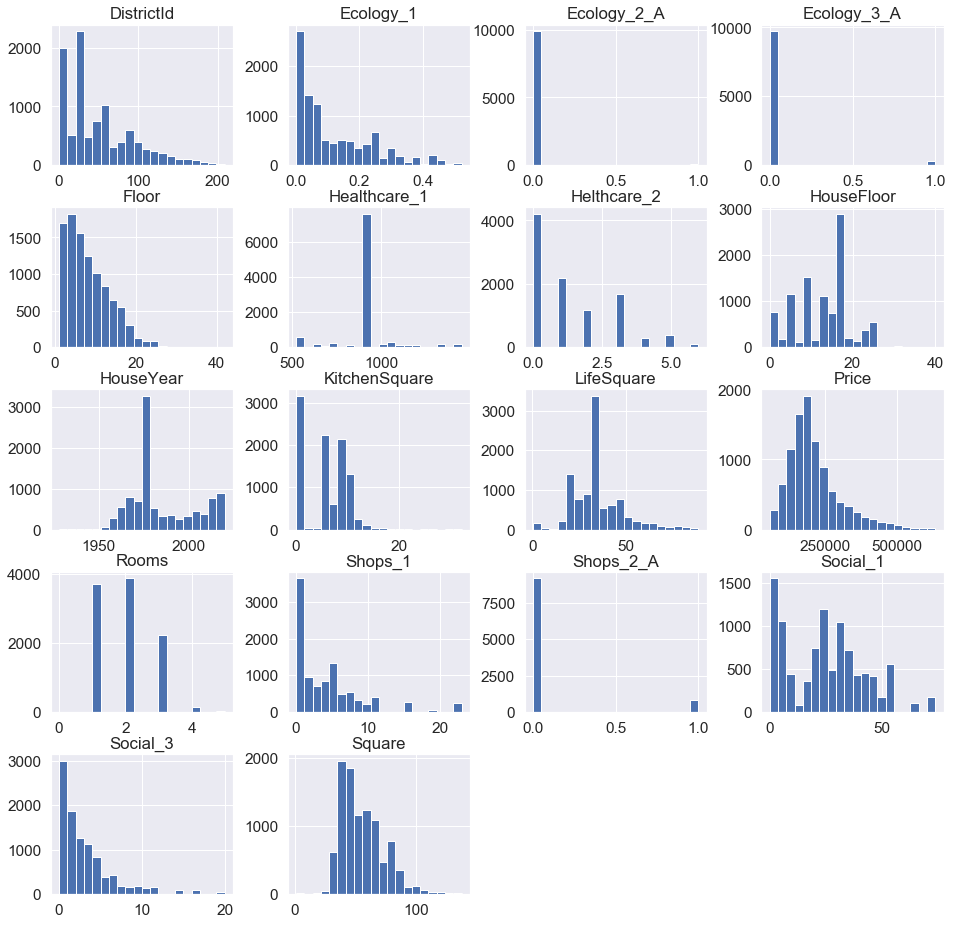

In [13]:
data1.hist(figsize=(16,16),bins=20)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,GridSearchCV

In [45]:
feature_names=data1.columns
feature_names=feature_names.drop('Price').tolist()

In [46]:
feature_names_for_stand=data1[feature_names].select_dtypes(include=['int64','float64']).columns.tolist()

In [47]:
feature_names_for_stand

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1']

In [48]:
scaler=StandardScaler()
standard_features=scaler.fit_transform(data1[feature_names_for_stand])
data1[feature_names_for_stand]=pd.DataFrame(standard_features,columns=feature_names_for_stand)

In [49]:
data1

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_3_A,Shops_2_A
0,-0.353348,0.139278,-0.434152,-0.375266,0.074144,-0.291306,-0.545242,-0.876668,-0.250529,0.474169,0.681803,-0.004081,-0.883480,1.408356,184966.930730,0,0,0
1,-0.215687,1.369647,0.549407,0.402226,0.579210,-0.291306,-0.545242,-0.382331,-0.998053,1.215681,-0.507976,-0.004081,-0.213923,2.448700,300009.450063,0,0,0
2,0.059635,0.139278,-0.602705,-0.393235,-1.441056,-0.100498,-0.086426,-0.931595,-0.581588,0.531208,-0.805421,-0.004081,-0.213923,-0.256195,220925.908524,0,0,0
3,0.174352,0.139278,-0.135706,1.331831,0.831744,-0.100498,0.678269,-0.437258,2.680470,-0.096225,0.086913,1.274209,-0.883480,0.159943,175616.227217,0,0,0
4,1.115034,-1.091091,-0.897113,-0.790634,0.326677,0.471924,-0.086426,-0.492184,-0.894969,0.588247,-0.507976,-0.004081,0.455633,-0.048126,150226.531644,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.422178,0.139278,-0.299680,-0.299513,-0.178390,-0.482113,-1.156998,-0.931595,0.141089,1.215681,0.979248,-0.004081,1.125190,1.408356,196684.316040,0,0,0
9996,-0.743386,-1.091091,-0.793082,-1.027907,0.831744,0.853539,0.066513,0.826048,-0.998641,0.303050,-0.805421,-0.004081,-0.883480,0.159943,189050.289571,0,0,1
9997,-0.536895,-1.091091,-0.436516,-0.130549,-1.188523,0.662731,0.525330,1.649943,-0.392373,-1.294053,-0.507976,-0.004081,-0.883480,-0.880402,159143.805370,0,0,1
9998,0.564391,0.139278,-0.677457,-0.052931,0.579210,-1.436150,-1.156998,-1.316079,1.584694,0.303050,1.871583,-0.004081,0.455633,0.159943,181595.339808,0,1,0


In [50]:
target='Price'
y=data1[target]
X=data1.drop([target],axis=1)

In [43]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=54)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)

0.563561906709644

In [54]:
gb_model=GradientBoostingRegressor()
gb_model.fit(x_train,y_train)
y_train_preds=gb_model.predict(x_train)
r2_score(y_train,y_train_preds)

0.7631630185801959

In [58]:
params={'n_estimators':[50,100,200,400],'max_depth':[3,5,7,10,12]}
gs=GridSearchCV(gb_model,params,scoring='r2',cv=KFold(n_splits=3,random_state=21,shuffle=True))
gs.fit(X,y)

GridSearchCV(cv=KFold(n_splits=3, random_state=21, shuffle=True),
             error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                            

In [59]:
gs.best_params_

{'max_depth': 5, 'n_estimators': 200}

In [86]:
model_final=GradientBoostingRegressor(n_estimators=200,max_depth=5,random_state=21)
model_final.fit(x_train,y_train)
y_train_preds=model_final.predict(x_train)
r2_score(y_train,y_train_preds)

0.9042607087165542

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A


In [83]:
data_test=pd.read_csv('test.csv')
data_test=pd.get_dummies(data_test)
median_LifeSquare=data_test['LifeSquare'].median()
data_test['LifeSquare']=data_test['LifeSquare'].fillna(median_LifeSquare)
median_Healthcare1=data_test['Healthcare_1'].median()
data_test['Healthcare_1']=data_test['Healthcare_1'].fillna(median_Healthcare1)
data_test1=data_test.drop(['Ecology_2_B','Ecology_3_B','Shops_2_B','Social_2','Id'],axis=1)
change_outlier(data_test1,'KitchenSquare')
change_outlier(data_test1,'LifeSquare')
change_outlier(data_test1,'Rooms')
change_outlier(data_test1,'HouseFloor')
change_outlier(data_test1,'Square')
change_outlier(data_test1,'HouseYear')
change_outlier(data_test1,'Healthcare_1')
change_outlier(data_test1,'Social_3')
feature_names=data_test1.columns
feature_names_for_stand=data_test1[feature_names].select_dtypes(include=['int64','float64']).columns.tolist()
scaler=StandardScaler()
standard_features=scaler.fit_transform(data_test1[feature_names_for_stand])
data_test1[feature_names_for_stand]=pd.DataFrame(standard_features,columns=feature_names_for_stand)

In [87]:
data_test1['Price']=model_final.predict(data_test1)

In [88]:
data_test1.head(10)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_3_A,Shops_2_A,Price
0,0.152140,0.117260,-0.345381,-0.097682,0.074954,-0.480057,0.217186,-0.684115,1.585280,-0.794834,-0.527131,0.002912,-0.891612,-0.888194,0,0,0,163964.616730
1,0.514336,0.117260,0.716511,-0.134478,-1.221833,-0.480057,-1.746252,-0.410898,-0.367283,-1.080052,0.063757,0.002912,-0.891612,-0.469511,0,0,0,230242.384798
2,3.140252,-1.122276,-2.333487,-1.364909,1.631100,-1.209627,-1.142117,-0.410898,-0.998468,0.288994,-0.231687,0.002912,2.487242,0.158513,0,0,0,155051.799012
3,-0.096869,0.117260,0.923812,1.243728,0.853027,2.438224,1.425456,1.228409,-0.149940,-0.110311,0.063757,0.002912,1.135700,-0.260169,0,0,0,353842.038927
4,-0.549613,-1.122276,-0.474444,0.623812,-1.221833,1.526261,0.670288,1.774844,-0.397445,-1.308227,-0.527131,0.002912,-0.891612,-0.888194,0,0,1,141239.556580
5,0.038954,-1.122276,-0.849849,-0.134478,-1.221833,2.255831,1.274422,-0.410898,-0.585024,0.517169,-0.822575,0.002912,-0.215841,-0.260169,0,0,0,197218.240532
6,-0.640162,0.117260,0.652753,2.178840,-1.221833,-1.209627,0.670288,-0.410898,-0.367283,-1.080052,0.063757,0.002912,-0.891612,-0.469511,0,0,0,176908.431605
7,-0.436427,0.117260,-0.437910,-0.139366,0.074954,-0.662450,0.217186,-0.684115,0.131402,1.201692,0.950089,0.002912,1.135700,1.414561,0,0,0,217925.064580
8,1.012354,1.356796,0.881649,0.810889,0.853027,1.526261,0.670288,0.681973,-0.655997,1.600997,0.359201,0.002912,-0.215841,-0.050828,0,0,0,293102.150050
9,-1.024995,1.356796,1.316821,0.933484,0.853027,0.796691,0.670288,1.610913,1.027260,-1.137096,-0.822575,-2.544262,-0.891612,-0.888194,0,0,0,189719.046451


In [90]:
predictions=pd.DataFrame({'Id':data_test['Id'],'Price':data_test1['Price']},columns=['Id','Price'])

In [93]:
predictions.set_index('Id')
predictions

,Id,Price
0,725,163964.616730
1,15856,230242.384798
2,5480,155051.799012
3,15664,353842.038927
4,14275,141239.556580
...,...,...
4995,8180,251077.195256
4996,4695,135423.742287
4997,5783,333249.289732
4998,4780,190013.820621


In [94]:
predictions.to_csv('Starikov_predictions.csv')